In [2]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sweetviz

from sklearn.model_selection import train_test_split
from nflows.distributions import ConditionalDiagonalNormal

from src.probabilistic_flow_boosting.tfboost.tree import EmbeddableCatBoostPriorNormal, EmbeddableOneHotEncoder
from src.probabilistic_flow_boosting.tfboost.tfboost import TreeFlowBoost
from src.probabilistic_flow_boosting.tfboost.flow import ContinuousNormalizingFlow
from src.probabilistic_flow_boosting.pipelines.reporting.nodes import calculate_nll

from src.probabilistic_flow_boosting.pipelines.modeling.utils import setup_random_seed

RANDOM_SEED = 42

setup_random_seed(RANDOM_SEED)

In [3]:
df = pd.read_csv('data/01_raw/CatData/diamonds/diamonds.csv', index_col=0)

In [4]:
# analysis = sweetviz.analyze(df)
# analysis.show_notebook()

In [5]:
x = df.drop(columns = ['price'])
y = np.log10(df[['price']])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [7]:
x_train.shape, x_test.shape

((43152, 9), (10788, 9))

In [8]:
model = catboost.CatBoostRegressor(
    cat_features=['cut', 'color', 'clarity'], 
    loss_function="RMSEWithUncertainty",
    num_trees=2000,
    random_state=RANDOM_SEED
)

In [9]:
model.fit(x_tr, y_tr, eval_set=(x_val, y_val))

0:	learn: 0.5568868	test: 0.5552389	best: 0.5552389 (0)	total: 84.1ms	remaining: 2m 48s
1:	learn: 0.5203490	test: 0.5188016	best: 0.5188016 (1)	total: 100ms	remaining: 1m 40s
2:	learn: 0.4876647	test: 0.4861555	best: 0.4861555 (2)	total: 112ms	remaining: 1m 14s
3:	learn: 0.4581243	test: 0.4566052	best: 0.4566052 (3)	total: 122ms	remaining: 1m
4:	learn: 0.4307809	test: 0.4293062	best: 0.4293062 (4)	total: 132ms	remaining: 52.6s
5:	learn: 0.4042574	test: 0.4028861	best: 0.4028861 (5)	total: 142ms	remaining: 47.2s
6:	learn: 0.3797866	test: 0.3784157	best: 0.3784157 (6)	total: 152ms	remaining: 43.3s
7:	learn: 0.3554150	test: 0.3540436	best: 0.3540436 (7)	total: 162ms	remaining: 40.4s
8:	learn: 0.3320966	test: 0.3307832	best: 0.3307832 (8)	total: 172ms	remaining: 38s
9:	learn: 0.3097490	test: 0.3084743	best: 0.3084743 (9)	total: 182ms	remaining: 36.1s
10:	learn: 0.2871210	test: 0.2858704	best: 0.2858704 (10)	total: 192ms	remaining: 34.8s
11:	learn: 0.2651668	test: 0.2638751	best: 0.2638751 

92:	learn: -1.1082229	test: -1.1118979	best: -1.1118979 (92)	total: 900ms	remaining: 18.5s
93:	learn: -1.1200828	test: -1.1238549	best: -1.1238549 (93)	total: 909ms	remaining: 18.4s
94:	learn: -1.1319685	test: -1.1359355	best: -1.1359355 (94)	total: 919ms	remaining: 18.4s
95:	learn: -1.1437784	test: -1.1480451	best: -1.1480451 (95)	total: 926ms	remaining: 18.4s
96:	learn: -1.1545493	test: -1.1588902	best: -1.1588902 (96)	total: 935ms	remaining: 18.4s
97:	learn: -1.1662062	test: -1.1707757	best: -1.1707757 (97)	total: 943ms	remaining: 18.3s
98:	learn: -1.1762120	test: -1.1811906	best: -1.1811906 (98)	total: 951ms	remaining: 18.3s
99:	learn: -1.1859090	test: -1.1911197	best: -1.1911197 (99)	total: 960ms	remaining: 18.2s
100:	learn: -1.1927334	test: -1.1978915	best: -1.1978915 (100)	total: 971ms	remaining: 18.3s
101:	learn: -1.2026828	test: -1.2079707	best: -1.2079707 (101)	total: 979ms	remaining: 18.2s
102:	learn: -1.2084588	test: -1.2137318	best: -1.2137318 (102)	total: 986ms	remaining:

192:	learn: -1.5102005	test: -1.5180077	best: -1.5180077 (192)	total: 1.71s	remaining: 16s
193:	learn: -1.5131397	test: -1.5209698	best: -1.5209698 (193)	total: 1.72s	remaining: 16s
194:	learn: -1.5144923	test: -1.5223491	best: -1.5223491 (194)	total: 1.73s	remaining: 16s
195:	learn: -1.5146338	test: -1.5225117	best: -1.5225117 (195)	total: 1.73s	remaining: 16s
196:	learn: -1.5150170	test: -1.5228599	best: -1.5228599 (196)	total: 1.74s	remaining: 15.9s
197:	learn: -1.5162729	test: -1.5239862	best: -1.5239862 (197)	total: 1.75s	remaining: 15.9s
198:	learn: -1.5183478	test: -1.5261656	best: -1.5261656 (198)	total: 1.75s	remaining: 15.9s
199:	learn: -1.5195144	test: -1.5273820	best: -1.5273820 (199)	total: 1.76s	remaining: 15.9s
200:	learn: -1.5215288	test: -1.5293382	best: -1.5293382 (200)	total: 1.77s	remaining: 15.9s
201:	learn: -1.5225019	test: -1.5303101	best: -1.5303101 (201)	total: 1.78s	remaining: 15.8s
202:	learn: -1.5251822	test: -1.5319534	best: -1.5319534 (202)	total: 1.79s	re

295:	learn: -1.6170574	test: -1.6166800	best: -1.6166800 (295)	total: 2.52s	remaining: 14.5s
296:	learn: -1.6177259	test: -1.6172111	best: -1.6172111 (296)	total: 2.52s	remaining: 14.5s
297:	learn: -1.6191082	test: -1.6185189	best: -1.6185189 (297)	total: 2.54s	remaining: 14.5s
298:	learn: -1.6193393	test: -1.6187381	best: -1.6187381 (298)	total: 2.54s	remaining: 14.4s
299:	learn: -1.6202763	test: -1.6196773	best: -1.6196773 (299)	total: 2.55s	remaining: 14.4s
300:	learn: -1.6211687	test: -1.6205312	best: -1.6205312 (300)	total: 2.56s	remaining: 14.4s
301:	learn: -1.6219671	test: -1.6213361	best: -1.6213361 (301)	total: 2.57s	remaining: 14.4s
302:	learn: -1.6224685	test: -1.6217140	best: -1.6217140 (302)	total: 2.58s	remaining: 14.4s
303:	learn: -1.6226840	test: -1.6218923	best: -1.6218923 (303)	total: 2.58s	remaining: 14.4s
304:	learn: -1.6238355	test: -1.6229645	best: -1.6229645 (304)	total: 2.59s	remaining: 14.4s
305:	learn: -1.6249612	test: -1.6241132	best: -1.6241132 (305)	total: 

386:	learn: -1.6788984	test: -1.6720615	best: -1.6720615 (386)	total: 3.33s	remaining: 13.9s
387:	learn: -1.6796213	test: -1.6726248	best: -1.6726248 (387)	total: 3.34s	remaining: 13.9s
388:	learn: -1.6803463	test: -1.6732736	best: -1.6732736 (388)	total: 3.35s	remaining: 13.9s
389:	learn: -1.6807406	test: -1.6735524	best: -1.6735524 (389)	total: 3.36s	remaining: 13.9s
390:	learn: -1.6813745	test: -1.6740761	best: -1.6740761 (390)	total: 3.37s	remaining: 13.9s
391:	learn: -1.6819437	test: -1.6745218	best: -1.6745218 (391)	total: 3.38s	remaining: 13.9s
392:	learn: -1.6824490	test: -1.6749512	best: -1.6749512 (392)	total: 3.38s	remaining: 13.8s
393:	learn: -1.6828304	test: -1.6752804	best: -1.6752804 (393)	total: 3.39s	remaining: 13.8s
394:	learn: -1.6832430	test: -1.6755962	best: -1.6755962 (394)	total: 3.4s	remaining: 13.8s
395:	learn: -1.6836856	test: -1.6759544	best: -1.6759544 (395)	total: 3.41s	remaining: 13.8s
396:	learn: -1.6841702	test: -1.6762562	best: -1.6762562 (396)	total: 3

479:	learn: -1.7247040	test: -1.7078712	best: -1.7078712 (479)	total: 4.15s	remaining: 13.1s
480:	learn: -1.7249809	test: -1.7080711	best: -1.7080711 (480)	total: 4.16s	remaining: 13.1s
481:	learn: -1.7255285	test: -1.7084610	best: -1.7084610 (481)	total: 4.17s	remaining: 13.1s
482:	learn: -1.7261085	test: -1.7088172	best: -1.7088172 (482)	total: 4.18s	remaining: 13.1s
483:	learn: -1.7263385	test: -1.7090052	best: -1.7090052 (483)	total: 4.19s	remaining: 13.1s
484:	learn: -1.7266727	test: -1.7092424	best: -1.7092424 (484)	total: 4.2s	remaining: 13.1s
485:	learn: -1.7271662	test: -1.7098051	best: -1.7098051 (485)	total: 4.21s	remaining: 13.1s
486:	learn: -1.7275086	test: -1.7100658	best: -1.7100658 (486)	total: 4.21s	remaining: 13.1s
487:	learn: -1.7275856	test: -1.7100920	best: -1.7100920 (487)	total: 4.22s	remaining: 13.1s
488:	learn: -1.7281285	test: -1.7104549	best: -1.7104549 (488)	total: 4.23s	remaining: 13.1s
489:	learn: -1.7285843	test: -1.7108865	best: -1.7108865 (489)	total: 4

568:	learn: -1.7518340	test: -1.7246293	best: -1.7246293 (568)	total: 4.96s	remaining: 12.5s
569:	learn: -1.7519796	test: -1.7246542	best: -1.7246542 (569)	total: 4.97s	remaining: 12.5s
570:	learn: -1.7521827	test: -1.7246729	best: -1.7246729 (570)	total: 4.98s	remaining: 12.5s
571:	learn: -1.7524647	test: -1.7248789	best: -1.7248789 (571)	total: 4.99s	remaining: 12.5s
572:	learn: -1.7526572	test: -1.7249473	best: -1.7249473 (572)	total: 5s	remaining: 12.4s
573:	learn: -1.7527418	test: -1.7249349	best: -1.7249473 (572)	total: 5s	remaining: 12.4s
574:	learn: -1.7530664	test: -1.7251305	best: -1.7251305 (574)	total: 5.01s	remaining: 12.4s
575:	learn: -1.7532279	test: -1.7252476	best: -1.7252476 (575)	total: 5.02s	remaining: 12.4s
576:	learn: -1.7534791	test: -1.7252879	best: -1.7252879 (576)	total: 5.03s	remaining: 12.4s
577:	learn: -1.7536211	test: -1.7253798	best: -1.7253798 (577)	total: 5.04s	remaining: 12.4s
578:	learn: -1.7537340	test: -1.7253747	best: -1.7253798 (577)	total: 5.05s	

669:	learn: -1.7777087	test: -1.7416147	best: -1.7416147 (669)	total: 6s	remaining: 11.9s
670:	learn: -1.7778497	test: -1.7416696	best: -1.7416696 (670)	total: 6.01s	remaining: 11.9s
671:	learn: -1.7780013	test: -1.7417419	best: -1.7417419 (671)	total: 6.02s	remaining: 11.9s
672:	learn: -1.7782849	test: -1.7419951	best: -1.7419951 (672)	total: 6.03s	remaining: 11.9s
673:	learn: -1.7784001	test: -1.7420667	best: -1.7420667 (673)	total: 6.04s	remaining: 11.9s
674:	learn: -1.7788630	test: -1.7425050	best: -1.7425050 (674)	total: 6.05s	remaining: 11.9s
675:	learn: -1.7794577	test: -1.7425981	best: -1.7425981 (675)	total: 6.05s	remaining: 11.9s
676:	learn: -1.7799880	test: -1.7430536	best: -1.7430536 (676)	total: 6.06s	remaining: 11.8s
677:	learn: -1.7802941	test: -1.7434080	best: -1.7434080 (677)	total: 6.07s	remaining: 11.8s
678:	learn: -1.7805988	test: -1.7435815	best: -1.7435815 (678)	total: 6.08s	remaining: 11.8s
679:	learn: -1.7807615	test: -1.7435517	best: -1.7435815 (678)	total: 6.0

758:	learn: -1.8047733	test: -1.7616015	best: -1.7616015 (758)	total: 6.83s	remaining: 11.2s
759:	learn: -1.8049990	test: -1.7617024	best: -1.7617024 (759)	total: 6.83s	remaining: 11.2s
760:	learn: -1.8053685	test: -1.7620508	best: -1.7620508 (760)	total: 6.85s	remaining: 11.1s
761:	learn: -1.8058434	test: -1.7624217	best: -1.7624217 (761)	total: 6.86s	remaining: 11.1s
762:	learn: -1.8061122	test: -1.7626119	best: -1.7626119 (762)	total: 6.87s	remaining: 11.1s
763:	learn: -1.8069310	test: -1.7629814	best: -1.7629814 (763)	total: 6.87s	remaining: 11.1s
764:	learn: -1.8071158	test: -1.7630380	best: -1.7630380 (764)	total: 6.88s	remaining: 11.1s
765:	learn: -1.8073262	test: -1.7631149	best: -1.7631149 (765)	total: 6.89s	remaining: 11.1s
766:	learn: -1.8076927	test: -1.7633691	best: -1.7633691 (766)	total: 6.9s	remaining: 11.1s
767:	learn: -1.8078604	test: -1.7635534	best: -1.7635534 (767)	total: 6.91s	remaining: 11.1s
768:	learn: -1.8080876	test: -1.7635270	best: -1.7635534 (767)	total: 6

847:	learn: -1.8199434	test: -1.7682296	best: -1.7682296 (847)	total: 7.64s	remaining: 10.4s
848:	learn: -1.8200855	test: -1.7682358	best: -1.7682358 (848)	total: 7.65s	remaining: 10.4s
849:	learn: -1.8203039	test: -1.7683977	best: -1.7683977 (849)	total: 7.66s	remaining: 10.4s
850:	learn: -1.8205023	test: -1.7684059	best: -1.7684059 (850)	total: 7.67s	remaining: 10.4s
851:	learn: -1.8208205	test: -1.7686599	best: -1.7686599 (851)	total: 7.68s	remaining: 10.3s
852:	learn: -1.8209839	test: -1.7687306	best: -1.7687306 (852)	total: 7.69s	remaining: 10.3s
853:	learn: -1.8211056	test: -1.7687550	best: -1.7687550 (853)	total: 7.7s	remaining: 10.3s
854:	learn: -1.8214246	test: -1.7691031	best: -1.7691031 (854)	total: 7.71s	remaining: 10.3s
855:	learn: -1.8215991	test: -1.7692209	best: -1.7692209 (855)	total: 7.72s	remaining: 10.3s
856:	learn: -1.8218556	test: -1.7693453	best: -1.7693453 (856)	total: 7.73s	remaining: 10.3s
857:	learn: -1.8219521	test: -1.7692554	best: -1.7693453 (856)	total: 7

950:	learn: -1.8382511	test: -1.7763459	best: -1.7763796 (949)	total: 8.65s	remaining: 9.54s
951:	learn: -1.8383826	test: -1.7763568	best: -1.7763796 (949)	total: 8.66s	remaining: 9.54s
952:	learn: -1.8384829	test: -1.7763789	best: -1.7763796 (949)	total: 8.67s	remaining: 9.53s
953:	learn: -1.8386834	test: -1.7765076	best: -1.7765076 (953)	total: 8.7s	remaining: 9.54s
954:	learn: -1.8387870	test: -1.7763993	best: -1.7765076 (953)	total: 8.71s	remaining: 9.53s
955:	learn: -1.8390320	test: -1.7765372	best: -1.7765372 (955)	total: 8.73s	remaining: 9.53s
956:	learn: -1.8391275	test: -1.7765512	best: -1.7765512 (956)	total: 8.76s	remaining: 9.55s
957:	learn: -1.8392021	test: -1.7765963	best: -1.7765963 (957)	total: 8.78s	remaining: 9.55s
958:	learn: -1.8392909	test: -1.7765914	best: -1.7765963 (957)	total: 8.79s	remaining: 9.54s
959:	learn: -1.8393106	test: -1.7765960	best: -1.7765963 (957)	total: 8.79s	remaining: 9.53s
960:	learn: -1.8394489	test: -1.7766916	best: -1.7766916 (960)	total: 8

1050:	learn: -1.8490713	test: -1.7792694	best: -1.7792694 (1050)	total: 9.67s	remaining: 8.73s
1051:	learn: -1.8491540	test: -1.7792811	best: -1.7792811 (1051)	total: 9.68s	remaining: 8.72s
1052:	learn: -1.8492532	test: -1.7792952	best: -1.7792952 (1052)	total: 9.69s	remaining: 8.71s
1053:	learn: -1.8493124	test: -1.7792656	best: -1.7792952 (1052)	total: 9.7s	remaining: 8.7s
1054:	learn: -1.8493670	test: -1.7792825	best: -1.7792952 (1052)	total: 9.71s	remaining: 8.69s
1055:	learn: -1.8494670	test: -1.7793232	best: -1.7793232 (1055)	total: 9.72s	remaining: 8.69s
1056:	learn: -1.8495417	test: -1.7793471	best: -1.7793471 (1056)	total: 9.73s	remaining: 8.68s
1057:	learn: -1.8496279	test: -1.7793288	best: -1.7793471 (1056)	total: 9.74s	remaining: 8.67s
1058:	learn: -1.8497258	test: -1.7793376	best: -1.7793471 (1056)	total: 9.74s	remaining: 8.66s
1059:	learn: -1.8497991	test: -1.7793307	best: -1.7793471 (1056)	total: 9.75s	remaining: 8.65s
1060:	learn: -1.8499197	test: -1.7792774	best: -1.77

1157:	learn: -1.8589846	test: -1.7812692	best: -1.7812692 (1157)	total: 10.7s	remaining: 7.76s
1158:	learn: -1.8590615	test: -1.7812769	best: -1.7812769 (1158)	total: 10.7s	remaining: 7.76s
1159:	learn: -1.8591412	test: -1.7812531	best: -1.7812769 (1158)	total: 10.7s	remaining: 7.75s
1160:	learn: -1.8591752	test: -1.7812610	best: -1.7812769 (1158)	total: 10.7s	remaining: 7.74s
1161:	learn: -1.8592324	test: -1.7812859	best: -1.7812859 (1161)	total: 10.7s	remaining: 7.73s
1162:	learn: -1.8592852	test: -1.7812836	best: -1.7812859 (1161)	total: 10.7s	remaining: 7.72s
1163:	learn: -1.8593617	test: -1.7812800	best: -1.7812859 (1161)	total: 10.7s	remaining: 7.71s
1164:	learn: -1.8596085	test: -1.7814401	best: -1.7814401 (1164)	total: 10.8s	remaining: 7.71s
1165:	learn: -1.8596684	test: -1.7814540	best: -1.7814540 (1165)	total: 10.8s	remaining: 7.7s
1166:	learn: -1.8597357	test: -1.7814699	best: -1.7814699 (1166)	total: 10.8s	remaining: 7.69s
1167:	learn: -1.8598210	test: -1.7816044	best: -1.7

1265:	learn: -1.8708750	test: -1.7837922	best: -1.7839061 (1257)	total: 11.7s	remaining: 6.78s
1266:	learn: -1.8709476	test: -1.7838086	best: -1.7839061 (1257)	total: 11.7s	remaining: 6.77s
1267:	learn: -1.8709513	test: -1.7837938	best: -1.7839061 (1257)	total: 11.7s	remaining: 6.76s
1268:	learn: -1.8710078	test: -1.7838423	best: -1.7839061 (1257)	total: 11.7s	remaining: 6.75s
1269:	learn: -1.8710854	test: -1.7838559	best: -1.7839061 (1257)	total: 11.7s	remaining: 6.74s
1270:	learn: -1.8712479	test: -1.7839361	best: -1.7839361 (1270)	total: 11.7s	remaining: 6.73s
1271:	learn: -1.8713453	test: -1.7839734	best: -1.7839734 (1271)	total: 11.7s	remaining: 6.72s
1272:	learn: -1.8715318	test: -1.7841416	best: -1.7841416 (1272)	total: 11.8s	remaining: 6.71s
1273:	learn: -1.8715317	test: -1.7841272	best: -1.7841416 (1272)	total: 11.8s	remaining: 6.71s
1274:	learn: -1.8715829	test: -1.7840597	best: -1.7841416 (1272)	total: 11.8s	remaining: 6.7s
1275:	learn: -1.8716402	test: -1.7840197	best: -1.7

1370:	learn: -1.8793573	test: -1.7861777	best: -1.7862723 (1355)	total: 12.7s	remaining: 5.82s
1371:	learn: -1.8793870	test: -1.7861873	best: -1.7862723 (1355)	total: 12.7s	remaining: 5.81s
1372:	learn: -1.8794124	test: -1.7861878	best: -1.7862723 (1355)	total: 12.7s	remaining: 5.8s
1373:	learn: -1.8794627	test: -1.7862094	best: -1.7862723 (1355)	total: 12.7s	remaining: 5.79s
1374:	learn: -1.8794916	test: -1.7862473	best: -1.7862723 (1355)	total: 12.7s	remaining: 5.79s
1375:	learn: -1.8795465	test: -1.7862174	best: -1.7862723 (1355)	total: 12.7s	remaining: 5.78s
1376:	learn: -1.8795771	test: -1.7861883	best: -1.7862723 (1355)	total: 12.7s	remaining: 5.77s
1377:	learn: -1.8796288	test: -1.7862418	best: -1.7862723 (1355)	total: 12.8s	remaining: 5.76s
1378:	learn: -1.8796507	test: -1.7862634	best: -1.7862723 (1355)	total: 12.8s	remaining: 5.75s
1379:	learn: -1.8796871	test: -1.7862654	best: -1.7862723 (1355)	total: 12.8s	remaining: 5.74s
1380:	learn: -1.8798077	test: -1.7863723	best: -1.7

1457:	learn: -1.8854567	test: -1.7878471	best: -1.7878872 (1456)	total: 13.5s	remaining: 5.02s
1458:	learn: -1.8855323	test: -1.7878911	best: -1.7878911 (1458)	total: 13.5s	remaining: 5.01s
1459:	learn: -1.8856299	test: -1.7878598	best: -1.7878911 (1458)	total: 13.5s	remaining: 5s
1460:	learn: -1.8857926	test: -1.7879291	best: -1.7879291 (1460)	total: 13.5s	remaining: 5s
1461:	learn: -1.8858073	test: -1.7879227	best: -1.7879291 (1460)	total: 13.6s	remaining: 4.99s
1462:	learn: -1.8858516	test: -1.7879071	best: -1.7879291 (1460)	total: 13.6s	remaining: 4.98s
1463:	learn: -1.8859303	test: -1.7879522	best: -1.7879522 (1463)	total: 13.6s	remaining: 4.97s
1464:	learn: -1.8859449	test: -1.7879251	best: -1.7879522 (1463)	total: 13.6s	remaining: 4.96s
1465:	learn: -1.8859508	test: -1.7879146	best: -1.7879522 (1463)	total: 13.6s	remaining: 4.95s
1466:	learn: -1.8860376	test: -1.7878704	best: -1.7879522 (1463)	total: 13.6s	remaining: 4.94s
1467:	learn: -1.8860398	test: -1.7878539	best: -1.787952

1564:	learn: -1.8947578	test: -1.7900364	best: -1.7901108 (1555)	total: 14.5s	remaining: 4.04s
1565:	learn: -1.8948648	test: -1.7901149	best: -1.7901149 (1565)	total: 14.5s	remaining: 4.03s
1566:	learn: -1.8949431	test: -1.7901026	best: -1.7901149 (1565)	total: 14.6s	remaining: 4.02s
1567:	learn: -1.8950604	test: -1.7901216	best: -1.7901216 (1567)	total: 14.6s	remaining: 4.01s
1568:	learn: -1.8951261	test: -1.7901147	best: -1.7901216 (1567)	total: 14.6s	remaining: 4s
1569:	learn: -1.8952200	test: -1.7901070	best: -1.7901216 (1567)	total: 14.6s	remaining: 4s
1570:	learn: -1.8953767	test: -1.7901955	best: -1.7901955 (1570)	total: 14.6s	remaining: 3.98s
1571:	learn: -1.8954835	test: -1.7901539	best: -1.7901955 (1570)	total: 14.6s	remaining: 3.98s
1572:	learn: -1.8956527	test: -1.7902558	best: -1.7902558 (1572)	total: 14.6s	remaining: 3.97s
1573:	learn: -1.8958089	test: -1.7903610	best: -1.7903610 (1573)	total: 14.6s	remaining: 3.96s
1574:	learn: -1.8959106	test: -1.7903937	best: -1.790393

1666:	learn: -1.9035518	test: -1.7921799	best: -1.7921799 (1666)	total: 15.6s	remaining: 3.11s
1667:	learn: -1.9036432	test: -1.7921933	best: -1.7921933 (1667)	total: 15.6s	remaining: 3.1s
1668:	learn: -1.9036746	test: -1.7921388	best: -1.7921933 (1667)	total: 15.6s	remaining: 3.09s
1669:	learn: -1.9037036	test: -1.7921101	best: -1.7921933 (1667)	total: 15.6s	remaining: 3.08s
1670:	learn: -1.9037767	test: -1.7920732	best: -1.7921933 (1667)	total: 15.6s	remaining: 3.07s
1671:	learn: -1.9038022	test: -1.7920827	best: -1.7921933 (1667)	total: 15.6s	remaining: 3.06s
1672:	learn: -1.9039371	test: -1.7920319	best: -1.7921933 (1667)	total: 15.6s	remaining: 3.05s
1673:	learn: -1.9039735	test: -1.7920175	best: -1.7921933 (1667)	total: 15.6s	remaining: 3.04s
1674:	learn: -1.9040357	test: -1.7920345	best: -1.7921933 (1667)	total: 15.6s	remaining: 3.03s
1675:	learn: -1.9040948	test: -1.7920411	best: -1.7921933 (1667)	total: 15.6s	remaining: 3.02s
1676:	learn: -1.9042400	test: -1.7920588	best: -1.7

1767:	learn: -1.9167856	test: -1.7958544	best: -1.7958544 (1767)	total: 16.6s	remaining: 2.17s
1768:	learn: -1.9168456	test: -1.7957832	best: -1.7958544 (1767)	total: 16.6s	remaining: 2.17s
1769:	learn: -1.9169468	test: -1.7956652	best: -1.7958544 (1767)	total: 16.6s	remaining: 2.16s
1770:	learn: -1.9171492	test: -1.7957978	best: -1.7958544 (1767)	total: 16.6s	remaining: 2.15s
1771:	learn: -1.9174294	test: -1.7958410	best: -1.7958544 (1767)	total: 16.6s	remaining: 2.14s
1772:	learn: -1.9174980	test: -1.7958410	best: -1.7958544 (1767)	total: 16.6s	remaining: 2.13s
1773:	learn: -1.9175297	test: -1.7957909	best: -1.7958544 (1767)	total: 16.6s	remaining: 2.12s
1774:	learn: -1.9176091	test: -1.7957947	best: -1.7958544 (1767)	total: 16.7s	remaining: 2.11s
1775:	learn: -1.9176741	test: -1.7957251	best: -1.7958544 (1767)	total: 16.7s	remaining: 2.1s
1776:	learn: -1.9177487	test: -1.7957658	best: -1.7958544 (1767)	total: 16.7s	remaining: 2.09s
1777:	learn: -1.9178704	test: -1.7962200	best: -1.7

1869:	learn: -1.9269323	test: -1.7988150	best: -1.7988447 (1867)	total: 17.6s	remaining: 1.22s
1870:	learn: -1.9270221	test: -1.7988982	best: -1.7988982 (1870)	total: 17.6s	remaining: 1.21s
1871:	learn: -1.9270367	test: -1.7989025	best: -1.7989025 (1871)	total: 17.6s	remaining: 1.2s
1872:	learn: -1.9270572	test: -1.7988826	best: -1.7989025 (1871)	total: 17.6s	remaining: 1.2s
1873:	learn: -1.9272293	test: -1.7989784	best: -1.7989784 (1873)	total: 17.6s	remaining: 1.19s
1874:	learn: -1.9273489	test: -1.7990028	best: -1.7990028 (1874)	total: 17.6s	remaining: 1.18s
1875:	learn: -1.9275190	test: -1.7991080	best: -1.7991080 (1875)	total: 17.7s	remaining: 1.17s
1876:	learn: -1.9275667	test: -1.7990075	best: -1.7991080 (1875)	total: 17.7s	remaining: 1.16s
1877:	learn: -1.9277237	test: -1.7990858	best: -1.7991080 (1875)	total: 17.7s	remaining: 1.15s
1878:	learn: -1.9278008	test: -1.7990369	best: -1.7991080 (1875)	total: 17.7s	remaining: 1.14s
1879:	learn: -1.9278034	test: -1.7990134	best: -1.79

1963:	learn: -1.9354157	test: -1.8012142	best: -1.8012142 (1963)	total: 18.6s	remaining: 342ms
1964:	learn: -1.9354570	test: -1.8009904	best: -1.8012142 (1963)	total: 18.7s	remaining: 332ms
1965:	learn: -1.9354960	test: -1.8009437	best: -1.8012142 (1963)	total: 18.7s	remaining: 323ms
1966:	learn: -1.9355705	test: -1.8008578	best: -1.8012142 (1963)	total: 18.7s	remaining: 313ms
1967:	learn: -1.9356131	test: -1.8008908	best: -1.8012142 (1963)	total: 18.7s	remaining: 304ms
1968:	learn: -1.9356378	test: -1.8008708	best: -1.8012142 (1963)	total: 18.7s	remaining: 294ms
1969:	learn: -1.9357296	test: -1.8008968	best: -1.8012142 (1963)	total: 18.7s	remaining: 285ms
1970:	learn: -1.9358154	test: -1.8009783	best: -1.8012142 (1963)	total: 18.7s	remaining: 275ms
1971:	learn: -1.9358533	test: -1.8009303	best: -1.8012142 (1963)	total: 18.7s	remaining: 266ms
1972:	learn: -1.9359030	test: -1.8009746	best: -1.8012142 (1963)	total: 18.7s	remaining: 256ms
1973:	learn: -1.9360328	test: -1.8009975	best: -1.

In [10]:
def calculate_nll_catboost(model: catboost.CatBoostRegressor, x: pd.DataFrame, y: pd.DataFrame):
    x: np.ndarray = x.values
    y: np.ndarray = y.values

    if y.shape[1] > 1:
        return np.nan

    y_hat_tree = model.predict(x)
    y_hat_tree[:, 1] = np.log(np.sqrt(y_hat_tree[:, 1]))  # Transform var to log std / CatBoost RMSEWithUncertainty

    distribution = ConditionalDiagonalNormal(shape=[1])  # Assume 1D distribution
    return -distribution.log_prob(y, y_hat_tree).numpy().mean()

In [11]:
calculate_nll_catboost(model, x_train, y_train)

-1.91402838096395

In [12]:
calculate_nll_catboost(model, x_test, y_test)

-1.8187341679251008

In [13]:
tree = EmbeddableOneHotEncoder(handle_unknown='ignore')

flow = ContinuousNormalizingFlow(input_dim=1, hidden_dims=(200, 100, 100, 50), 
                                 num_blocks=5, context_dim=100, conditional=True)

treeflow = TreeFlowBoost(tree, flow, embedding_size=100)

In [14]:
treeflow.fit(x_tr.values, y_tr.values, x_val.values, y_val.values, n_epochs=30, batch_size=1024, verbose=True)

train loss: 0.2763108015060425
val loss: 0.27189144492149353
train loss: -1.297871470451355
val loss: -1.2486467361450195
train loss: -1.523685336112976
val loss: -1.4279319047927856
train loss: -1.588576078414917
val loss: -1.49879789352417
train loss: -1.641660213470459
val loss: -1.543209433555603
train loss: -1.665899634361267
val loss: -1.5806515216827393
train loss: -1.6855019330978394
val loss: -1.6021782159805298
train loss: -1.6984083652496338
val loss: -1.6148242950439453
train loss: -1.7065449953079224
val loss: -1.6013988256454468
train loss: -1.734352946281433
val loss: -1.6390842199325562
train loss: -1.7350777387619019
val loss: -1.6136149168014526
train loss: -1.7715308666229248
val loss: -1.643837571144104
train loss: -1.772045373916626
val loss: -1.668209195137024
train loss: -1.8023244142532349
val loss: -1.6852139234542847
train loss: -1.8177210092544556
val loss: -1.6913450956344604
train loss: -1.8197848796844482
val loss: -1.6741725206375122
train loss: -1.856168

TreeFlowBoost(embedding_size=100,
              flow_model=<src.probabilistic_flow_boosting.tfboost.flow.flow.ContinuousNormalizingFlow object at 0x7f1ee152b250>,
              tree_model=EmbeddableOneHotEncoder(handle_unknown='ignore'))

In [15]:
calculate_nll(treeflow, x_train, y_train, batch_size = 1024)

-1.8910074

In [16]:
calculate_nll(treeflow, x_test, y_test, batch_size = 1024)

-1.7189131

In [17]:
data = x_test.iloc[:10, :]

In [18]:
y_test_catboost = model.predict(data)

y_test_samples = treeflow.sample(data.values, num_samples=1000)
y_test_samples = y_test_samples.squeeze()

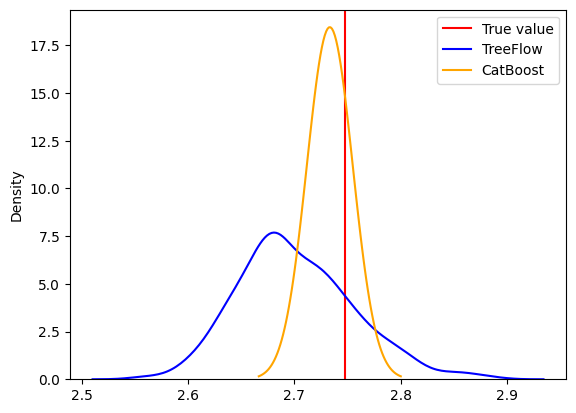

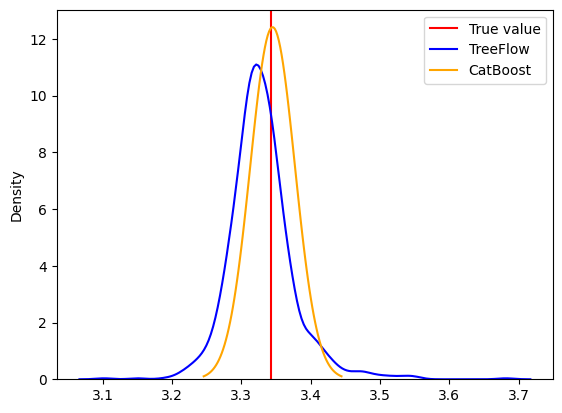

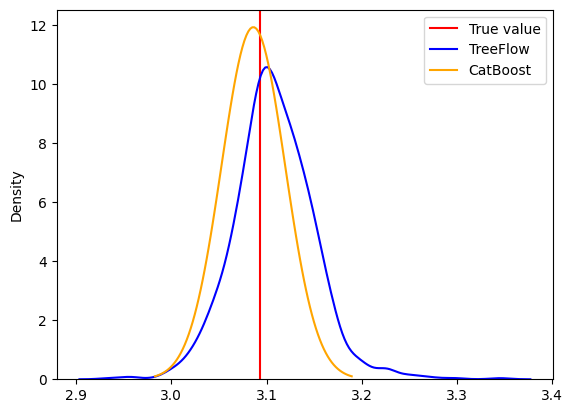

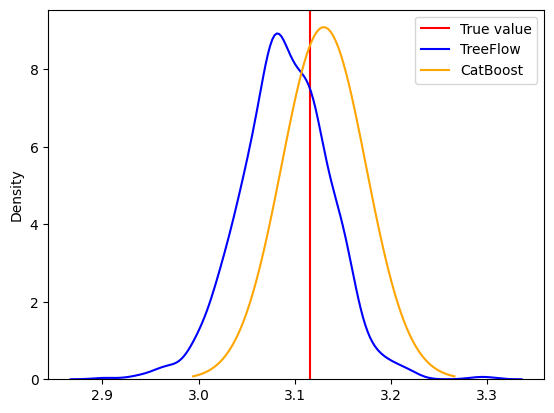

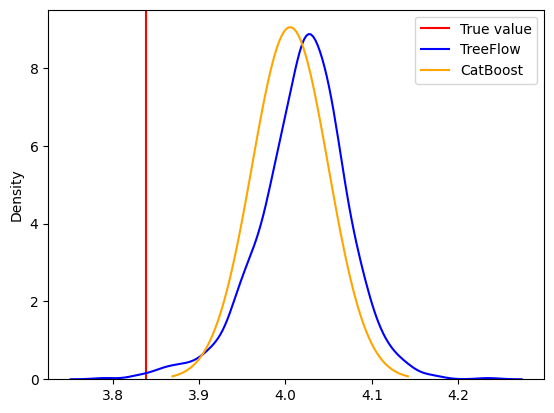

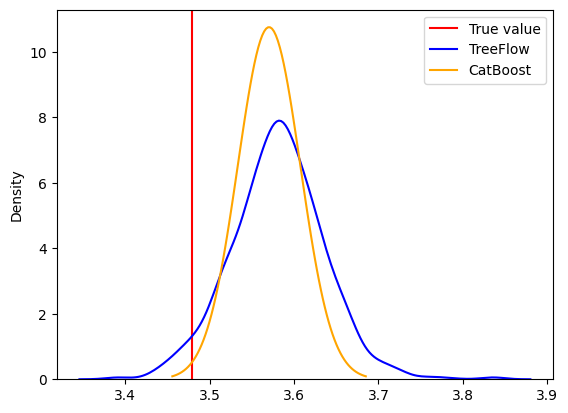

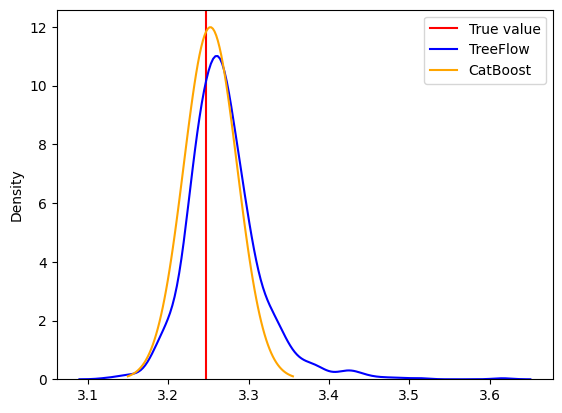

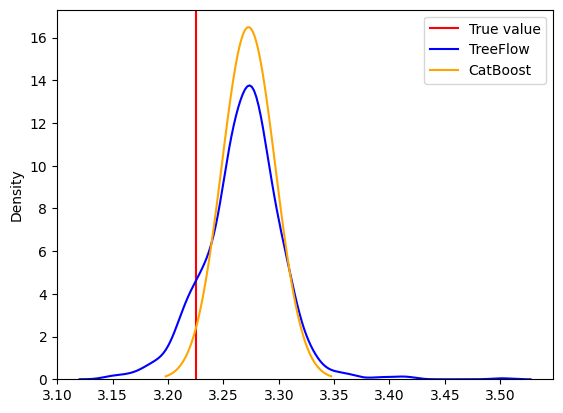

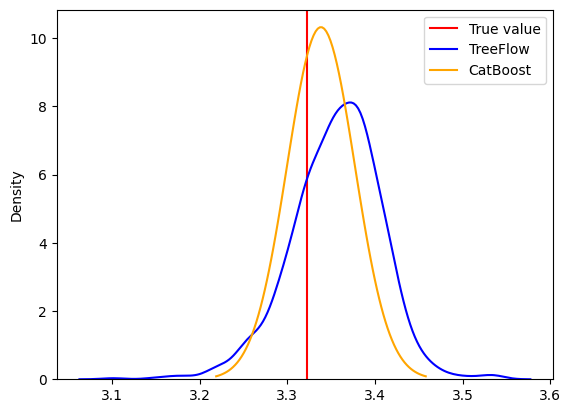

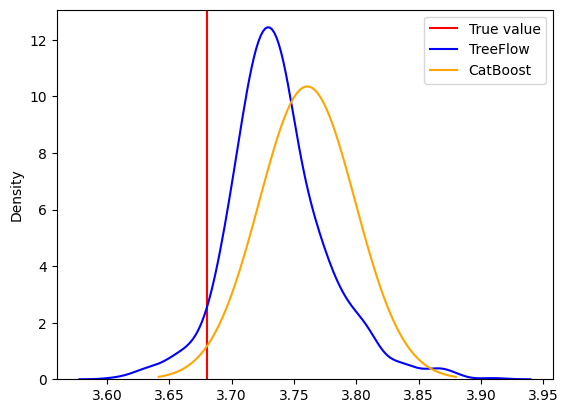

In [19]:
for i in range(10):
    plt.axvline(x=y_test.values[i, :], color='r', label='True value')

    sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

    x = np.linspace(
        stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        100
    )
    plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

    plt.legend()
    plt.show()